In [186]:
import numpy as np
from nilearn import datasets
from nilearn import maskers
from nilearn import image
from nilearn import input_data
from nilearn import plotting
from nilearn.connectome import ConnectivityMeasure
from nilearn.maskers import NiftiLabelsMasker
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bct

In [2]:
# nback_ts_power = np.load('01-extracted_timeseries/dualnback/LB_dualnback_timeseries_power_denoised_acompcor_no_smooth.npy')
nback_ts_scha = np.load('01-extracted_timeseries/dualnback/LB_dualnback_timeseries_schaefer_denoised_acompcor_no_smooth.npy')
rest_ts_scha = np.load('01-extracted_timeseries/rest/LB_rest_timeseries_schaefer_denoised_acompcor_no_smooth.npy')

In [3]:
regions = pd.read_csv('atlases/schaefer_2018/Schaefer2018_100Parcels_7Networks_order_FSLMNI152_2mm.Centroid_RAS.csv')

In [4]:
print(regions)

    ROI Label                         ROI Name   R   A   S
0           1               7Networks_LH_Vis_1 -26 -34 -18
1           2               7Networks_LH_Vis_2 -26 -76 -14
2           3               7Networks_LH_Vis_3 -18 -60  -6
3           4               7Networks_LH_Vis_4 -26 -96  -4
4           5               7Networks_LH_Vis_5  -6 -92  -2
..        ...                              ...  ..  ..  ..
95         96  7Networks_RH_Default_PFCdPFCm_1   6  48   0
96         97  7Networks_RH_Default_PFCdPFCm_2  12  50  40
97         98  7Networks_RH_Default_PFCdPFCm_3  26  24  50
98         99   7Networks_RH_Default_pCunPCC_1  12 -54  14
99        100   7Networks_RH_Default_pCunPCC_2   6 -52  30

[100 rows x 5 columns]


In [5]:
regions = regions.to_numpy()

In [6]:
len(regions)

100

In [7]:
coords = regions[:,2:]

In [8]:
for reg in range(0,len(regions)):
    regions[reg,1] = regions[reg,1][10:]

In [9]:
regions[:,1]

array(['LH_Vis_1', 'LH_Vis_2', 'LH_Vis_3', 'LH_Vis_4', 'LH_Vis_5',
       'LH_Vis_6', 'LH_Vis_7', 'LH_Vis_8', 'LH_Vis_9', 'LH_SomMot_1',
       'LH_SomMot_2', 'LH_SomMot_3', 'LH_SomMot_4', 'LH_SomMot_5',
       'LH_SomMot_6', 'LH_DorsAttn_Post_1', 'LH_DorsAttn_Post_2',
       'LH_DorsAttn_Post_3', 'LH_DorsAttn_Post_4', 'LH_DorsAttn_Post_5',
       'LH_DorsAttn_Post_6', 'LH_DorsAttn_PrCv_1', 'LH_DorsAttn_FEF_1',
       'LH_SalVentAttn_ParOper_1', 'LH_SalVentAttn_FrOperIns_1',
       'LH_SalVentAttn_FrOperIns_2', 'LH_SalVentAttn_PFCl_1',
       'LH_SalVentAttn_Med_1', 'LH_SalVentAttn_Med_2',
       'LH_SalVentAttn_Med_3', 'LH_Limbic_OFC_1', 'LH_Limbic_TempPole_1',
       'LH_Limbic_TempPole_2', 'LH_Cont_Par_1', 'LH_Cont_PFCl_1',
       'LH_Cont_pCun_1', 'LH_Cont_Cing_1', 'LH_Default_Temp_1',
       'LH_Default_Temp_2', 'LH_Default_Par_1', 'LH_Default_Par_2',
       'LH_Default_PFC_1', 'LH_Default_PFC_2', 'LH_Default_PFC_3',
       'LH_Default_PFC_4', 'LH_Default_PFC_5', 'LH_Default_PFC_6

In [10]:
labels_schaefer = regions[:,1]

In [11]:
schaefer_file = 'atlases/schaefer_2018/Schaefer2018_100Parcels_7Networks_order_FSLMNI152_2mm.nii.gz'
schaefer = NiftiLabelsMasker(schaefer_file)
# plotting.plot_img(schaefer_file)
# plotting.plot_roi(schaefer_file)

# Correlation matrices from the original original code

In [92]:
nback_corr_mat_wei = np.load('02-correlation_matrices/static/dualnback/LB_dual_schaefer_static_correlation_matrices_last.npy')
rest_corr_mat = np.load('02-correlation_matrices/static/rest/LB_rest_chaefer_static_correlation_matrices_last.npy')


## Checking the significance for later thresholding

In [88]:
np.max(nback_corr_mat_wei[1,0,0,:,:])

0.9363613001782953

In [89]:
np.min(nback_corr_mat_wei[1,0,0,:,:])

0.0

In [90]:
mean_test = np.mean(nback_corr_mat_wei[0,0,1,:,:])
mean_test

0.7120852357750488

In [91]:
mean_test2 = np.mean(nback_corr_mat_wei[11,0,1,:,:])
mean_test2

0.5008454759239984

In [21]:
print(rest_corr_mat.shape, nback_corr_mat_wei.shape)

(46, 1, 100, 100) (46, 1, 2, 100, 100)


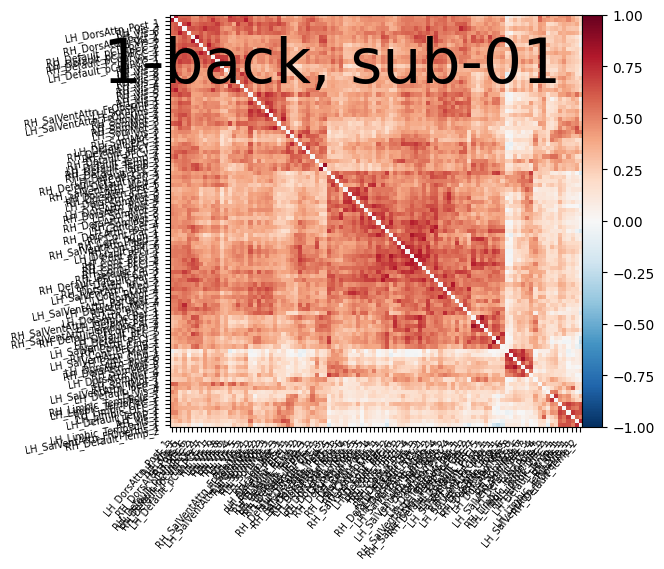

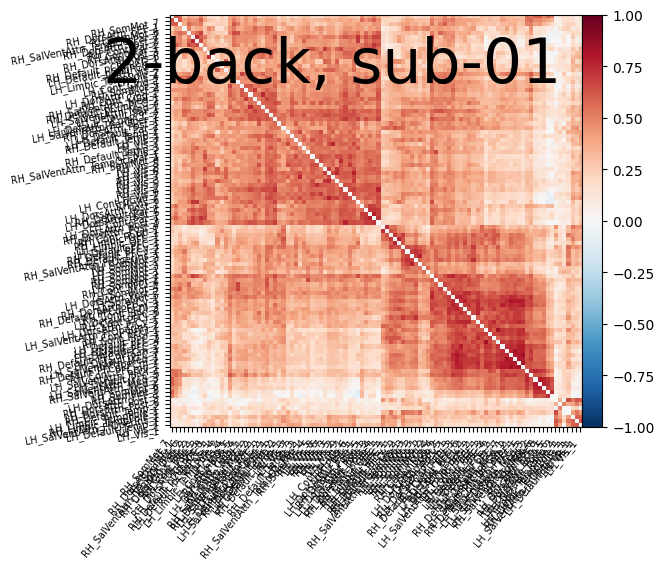

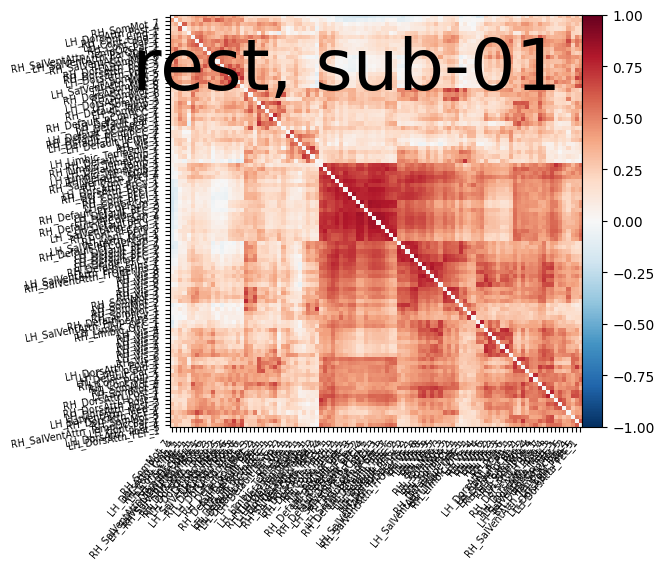

In [23]:
plotting.plot_matrix(nback_corr_mat_wei[2,0,0,:,:], labels=labels_schaefer,
                   vmax=1, vmin=-1, title=f"1-back, {subs[0]}", reorder=True)
plotting.plot_matrix(nback_corr_mat_wei[2,0,1,:,:], labels=labels_schaefer,
                   vmax=1, vmin=-1, title=f"2-back, {subs[0]}", reorder=True)
plotting.plot_matrix(rest_corr_mat[2,0,:,:], labels=labels_schaefer,
                   vmax=1, vmin=-1, title=f"rest, {subs[0]}", reorder=True)

# Removing bad subs

In [101]:
subs = np.load('subs_list.npy')

In [102]:
bad_subs = ['sub-13', 'sub-21', 'sub-23', 'sub-46', 'sub-47', 'sub-50']
bad_subs_idx = []
idx = 0
for sub in subs:
    idx += 1
    if sub in bad_subs:
        bad_subs_idx.append(idx-1)
        

In [103]:
bad_subs_idx

[10, 17, 18, 36, 37, 39]

In [104]:
nback_corr_mat_wei.shape

(46, 1, 2, 100, 100)

In [105]:
# nback_corr_mat_wei_2 = nback_corr_mat_wei
# nback_corr_mat_wei_3 = np.delete(nback_corr_mat_wei_2, bad_subs_idx, axis=0)

nback_corr_mat_wei = np.delete(nback_corr_mat_wei, bad_subs_idx, axis=0)

In [106]:
nback_corr_mat_wei.shape

(40, 1, 2, 100, 100)

In [107]:
rest_corr_mat = np.delete(rest_corr_mat, bad_subs_idx, axis=0)

In [108]:
rest_corr_mat.shape

(40, 1, 100, 100)

In [109]:
subs_good = np.delete(subs, bad_subs_idx)

In [110]:
subs_good = subs_good.tolist()

In [111]:
subs_good.index('sub-01')

0

In [184]:
np.save('subs_good', subs_good)

# Extracting conditions to separate arrays

In [223]:
nback_corr_mat_wei.shape

(40, 1, 2, 100, 100)

In [112]:
# 1-back
one_back_corr = np.array(nback_corr_mat_wei[:,0,0,:,:])
one_back_corr.shape

(40, 100, 100)

In [113]:
# 2-back
two_back_corr = np.array(nback_corr_mat_wei[:,0,1,:,:])
two_back_corr.shape

(40, 100, 100)

In [114]:
# rest
rest_corr = np.array(rest_corr_mat[:,0,:,:])
rest_corr.shape

(40, 100, 100)

In [119]:
np.min(rest_corr[1,:,:])

-0.3640141410990601

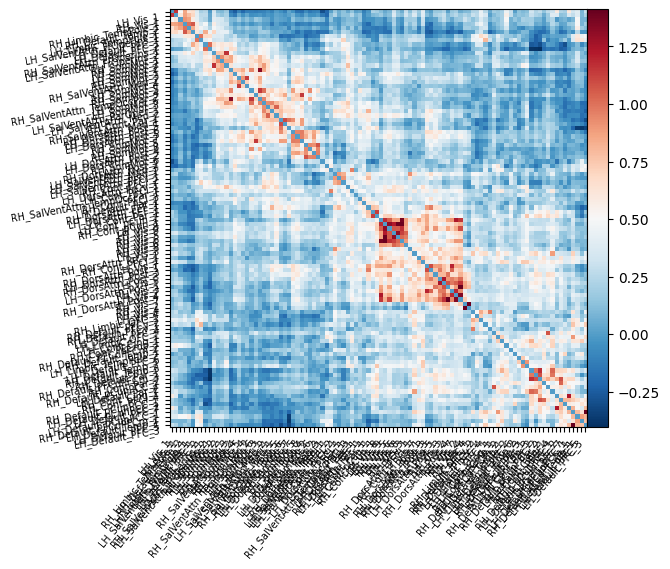

In [188]:
plotting.plot_matrix(rest_corr[7,:,:], labels=labels_schaefer, reorder=True)#, vmax=1, vmin=-1)

## BCT thresholding - pretty much the same

In [217]:
one_back_corr_thr = np.array(one_back_corr)
two_back_corr_thr = np.array(two_back_corr)
rest_corr_thr = np.array(rest_corr)

one_back_corr_bin = np.array(one_back_corr)
two_back_corr_bin = np.array(two_back_corr)
rest_corr_bin = np.array(rest_corr)

### 0.25 threshold

In [221]:
for sub in range(rest_corr.shape[0]):
    rest_corr_thr[sub] = bct.threshold_proportional(rest_corr[sub], .25, copy=True)
    rest_corr_bin[sub] = bct.binarize(rest_corr_thr[sub])

    one_back_corr_thr[sub] = bct.threshold_proportional(one_back_corr[sub], .25, copy=True)
    one_back_corr_bin[sub] = bct.binarize(one_back_corr_thr[sub])
    
    two_back_corr_thr[sub] = bct.threshold_proportional(two_back_corr[sub], .25, copy=True)
    two_back_corr_bin[sub] = bct.binarize(two_back_corr_thr[sub])


### 0.5 thrshold

In [214]:
for sub in range(rest_corr.shape[0]):
    rest_corr_thr[sub] = bct.threshold_proportional(rest_corr[sub], .5, copy=True)
    rest_corr_bin[sub] = bct.binarize(rest_corr_thr[sub])

    one_back_corr_thr[sub] = bct.threshold_proportional(one_back_corr[sub], .5, copy=True)
    one_back_corr_bin[sub] = bct.binarize(one_back_corr_thr[sub])
    
    two_back_corr_thr[sub] = bct.threshold_proportional(two_back_corr[sub], .5, copy=True)
    two_back_corr_bin[sub] = bct.binarize(two_back_corr_thr[sub])


## proportional/density-based thresholding 

In [129]:
def retain_top_20_percent(matrix):
    # Flatten the matrix to easily find the top 20% of values
    flattened = matrix.flatten()
    
    # Calculate the threshold for the top 20% values
    threshold = np.percentile(flattened, 80)
    
    # Create a new matrix with values less than the threshold set to zero
    pruned_matrix = np.where(matrix < threshold, 0, matrix)
    
    return pruned_matrix

In [143]:
def retain_top_20_percent(matrix):
    # Calculate the threshold for the top 20% values
    threshold = np.percentile(matrix, 80)
    
    # Create a mask for values below the threshold
    mask = matrix < threshold
    
    # Set values below the threshold to zero
    pruned_matrix = matrix.copy()
    pruned_matrix[mask] = 0
    
    return pruned_matrix

In [165]:
def binarize(matrix):
    matrix[matrix > 0] = 1
    return matrix

In [177]:
one_back_corr_thr = np.array(one_back_corr)
two_back_corr_thr = np.array(two_back_corr)
rest_corr_thr = np.array(rest_corr)

In [178]:
one_back_corr_bin = np.array(one_back_corr)
two_back_corr_bin = np.array(two_back_corr)
rest_corr_bin = np.array(rest_corr)

In [179]:
for sub in range(rest_corr.shape[0]):
    rest_corr_thr[sub] = retain_top_20_percent(rest_corr[sub])
    rest_corr_bin[sub] = binarize(np.array(rest_corr_thr[sub]))

    one_back_corr_thr[sub] = retain_top_20_percent(one_back_corr[sub])
    one_back_corr_bin[sub] = binarize(np.array(one_back_corr_thr[sub]))
    
    two_back_corr_thr[sub] = retain_top_20_percent(two_back_corr[sub])
    two_back_corr_bin[sub] = binarize(np.array(two_back_corr_thr[sub]))



## saving and checking

In [222]:
np.save('correlation_matrices/rest_corr_thr',rest_corr_thr)

np.save('correlation_matrices/one_back_corr_thr',one_back_corr_thr)

np.save('correlation_matrices/two_back_corr_thr',two_back_corr_thr)

In [216]:

np.save('correlation_matrices/rest_corr_binarized_50',rest_corr_bin)

np.save('correlation_matrices/one_back_corr_binarized_50',one_back_corr_bin)

np.save('correlation_matrices/two_back_corr_binarized_50',two_back_corr_bin)

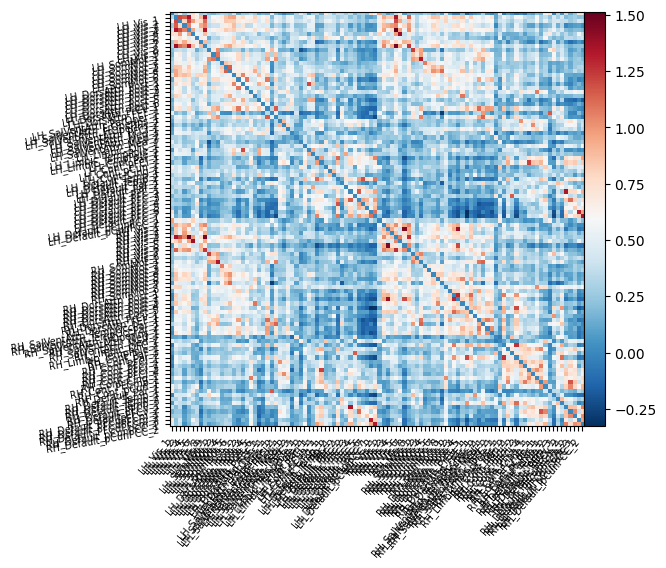

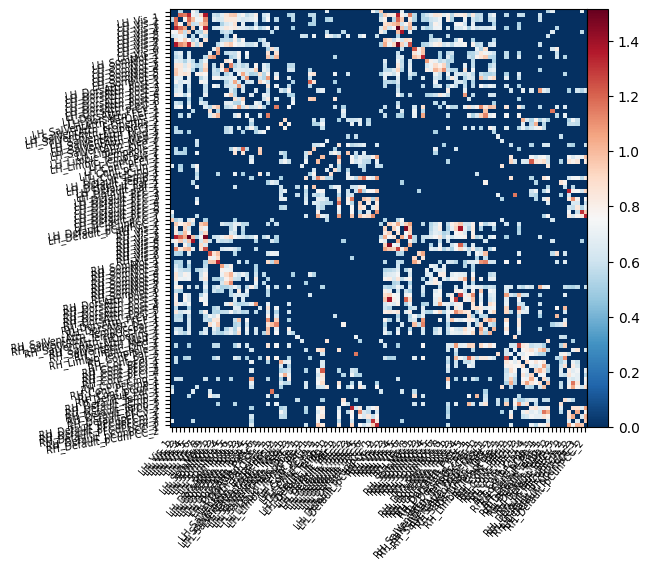

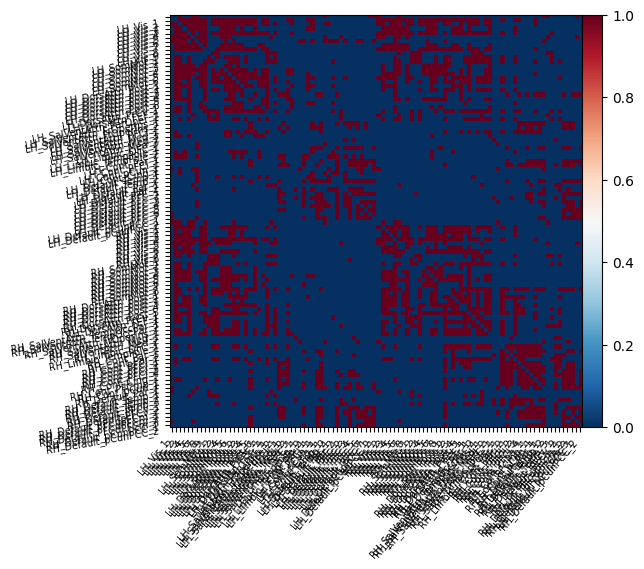

In [220]:
plotting.plot_matrix(rest_corr[4], labels=labels_schaefer)#, reorder=True)#, vmax=1, vmin=-1)
plotting.plot_matrix(rest_corr_thr[4], labels=labels_schaefer)#, reorder=True)#, vmax=1, vmin=-1)
plotting.plot_matrix(rest_corr_bin[4], labels=labels_schaefer)#, reorder=True)#, vmax=1, vmin=-1)